# Final Capstone: Revisiting the Netflix Prize

## Notebook 5: Variable Distributions and Transformations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from scipy import stats
from scipy.stats import yeojohnson as yj
from sklearn import metrics

sns.set_style('darkgrid')
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.4f}'.format)

In [2]:
%%time
base_path = 'C:/Users/jnpol/Documents/DS/Data Science/UL/'
train_features = pd.read_parquet(base_path + 'train_pca.parquet')
mov_pcs_train = pd.read_parquet(base_path + 'mov_pcs_train.parquet')
train_target = pd.read_parquet(base_path + 'train_target.parquet')
quiz_features = pd.read_parquet(base_path + 'quiz_pca.parquet')
quiz_target = pd.read_parquet(base_path + 'quiz_target.parquet')

# reset index for target dfs
train_target.reset_index(drop=True, inplace=True)
quiz_target.reset_index(drop=True, inplace=True)

train_features.info()
print()
mov_pcs_train.info()
print()
train_target.info()
print()
quiz_features.info()
print()
quiz_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96304740 entries, 0 to 96304739
Data columns (total 18 columns):
 #   Column           Dtype  
---  ------           -----  
 0   mov_id           int16  
 1   cust_id          int32  
 2   day_rated        int16  
 3   mov_year         int16  
 4   mov_count        int32  
 5   rated_bycust     int16  
 6   rate_each_day    int32  
 7   mov_day_count    uint16 
 8   cust_day_count   int16  
 9   cust_days_since  int16  
 10  mov_days_since   int16  
 11  cust_avg_rating  float32
 12  mov_day_avg      float32
 13  cust_day_avg     float32
 14  avg_rate_mov_yr  float32
 15  avg_rate_cst_yr  float32
 16  global_mean      float32
 17  cust_pc          float32
dtypes: float32(7), int16(7), int32(3), uint16(1)
memory usage: 5.0 GB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96304740 entries, 0 to 96304739
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   mov_pc_all     float32
 1   mov_pc_no_

In [3]:
def sub_plot(variable1, var_name1, split1, bins1, variable2,
             var_name2, split2, bins2, shrink1=1, shrink2=1):
    plt.figure(figsize=(17, 6))
    plt.subplot(1, 2, 1)
    ax1 = sns.histplot(variable1, bins=bins1, shrink=shrink1)
    ax1.set_title('Distribution of ' + var_name1 + ' (' + split1 + ')', fontsize=14)
    plt.xlabel(var_name1, fontsize=13)
    plt.xticks(fontsize=13)
    plt.ylabel('count', fontsize=13)
    plt.yticks(fontsize=13)
    print(var_name1 + ' stats (' + split1 + '):', stats.describe(variable1))
    
    plt.subplot(1, 2, 2)
    ax2 = sns.histplot(variable2, bins=bins2, shrink=shrink2)
    ax2.set_title('Distribution of ' + var_name2 + ' (' + split2 + ')', fontsize=14)
    plt.xlabel(var_name2, fontsize=13)
    plt.xticks(fontsize=13)
    plt.ylabel('count', fontsize=13)
    plt.yticks(fontsize=13)
    plt.tight_layout()
    plt.show()
    print(var_name2 + ' stats (' + split2 + '):', stats.describe(variable2))

## Distributions and Transformations

### Target: Rating

rating stats (train): DescribeResult(nobs=96304740, minmax=(1, 5), mean=3.6044090872370353, variance=1.1749744966445888, skewness=-0.5026478978313605, kurtosis=-0.3277745959102467)


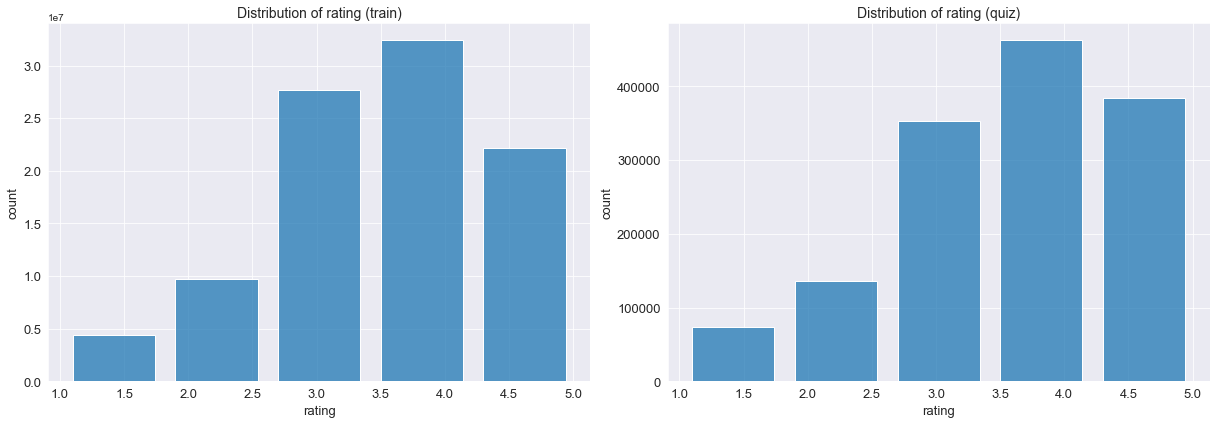

rating stats (quiz): DescribeResult(nobs=1408395, minmax=(1, 5), mean=3.6736284920068587, variance=1.271104586242111, skewness=-0.6101165501129961, kurtosis=-0.3295795956291072)
Wall time: 40.7 s


In [4]:
%%time
sub_plot(train_target.rating, 'rating', 'train', 5,
         quiz_target.rating, 'rating', 'quiz', 5, 0.8, 0.8)

### Feature: Movie ID

movie_id stats (train): DescribeResult(nobs=96304740, minmax=(1, 17770), mean=9098.385418890077, variance=26261236.013197586, skewness=-0.03391762132230225, kurtosis=-1.2269934968761798)


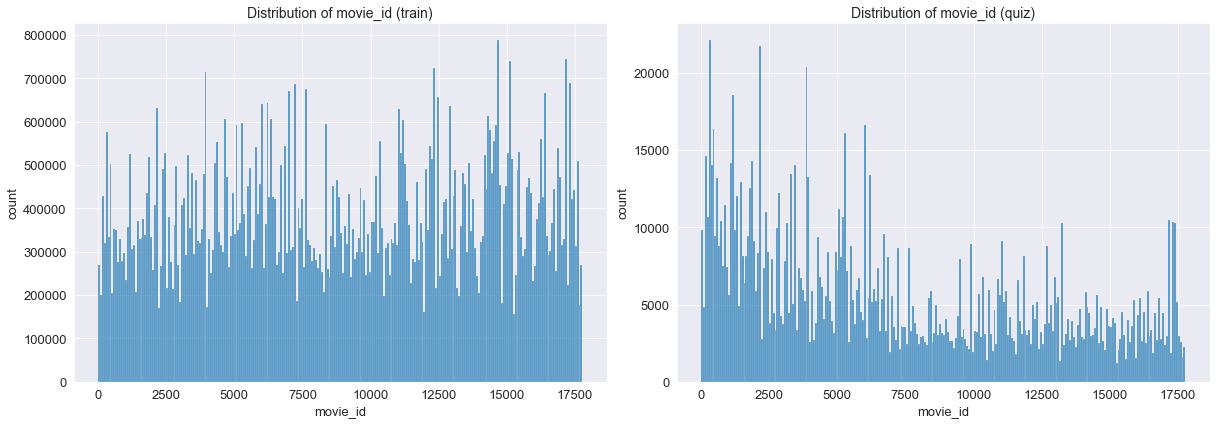

movie_id stats (quiz): DescribeResult(nobs=1408395, minmax=(1, 17770), mean=7021.4134053301805, variance=27682041.061360482, skewness=0.47739259408256063, kurtosis=-1.0381556478077267)
Wall time: 45.3 s


In [5]:
%%time
sub_plot(train_features.mov_id, 'movie_id', 'train', 250,
         quiz_features.mov_id, 'movie_id', 'quiz', 250)

### Feature: Customer ID

customer_id stats (train): DescribeResult(nobs=96304740, minmax=(6, 2649429), mean=1322745.1734834237, variance=584562111254.3285, skewness=0.007056308235288831, kurtosis=-1.1990500803175166)


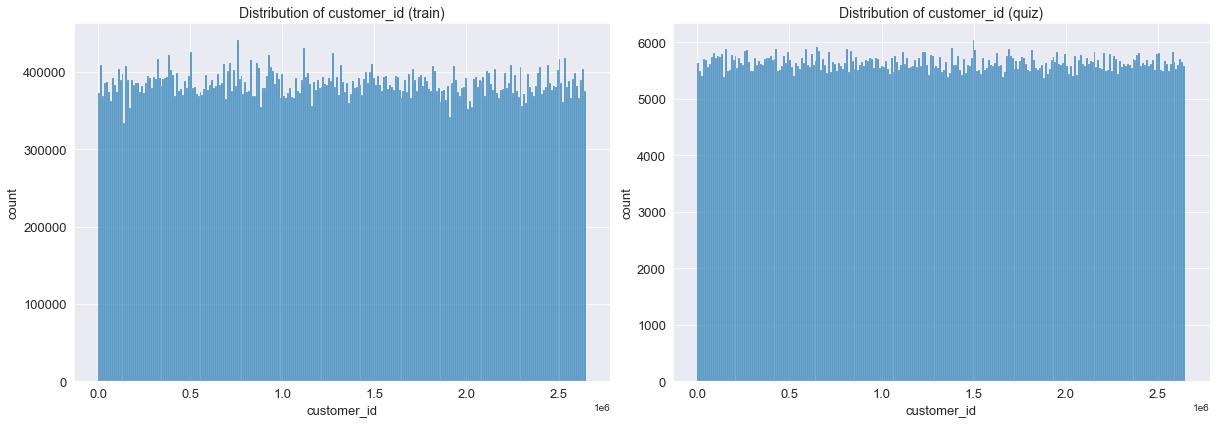

customer_id stats (quiz): DescribeResult(nobs=1408395, minmax=(6, 2649429), mean=1323335.8123196973, variance=585703745308.5532, skewness=0.0027644199484865243, kurtosis=-1.202163685623027)
Wall time: 44.8 s


In [6]:
%%time
sub_plot(train_features.cust_id, 'customer_id', 'train', 250,
         quiz_features.cust_id, 'customer_id', 'quiz', 250)

### Feature: Movie Release Year

release year stats (train): DescribeResult(nobs=96304740, minmax=(1896, 2005), mean=1993.8734354404571, variance=153.4227710130996, skewness=-2.158273926657244, kurtosis=5.4258904624820605)


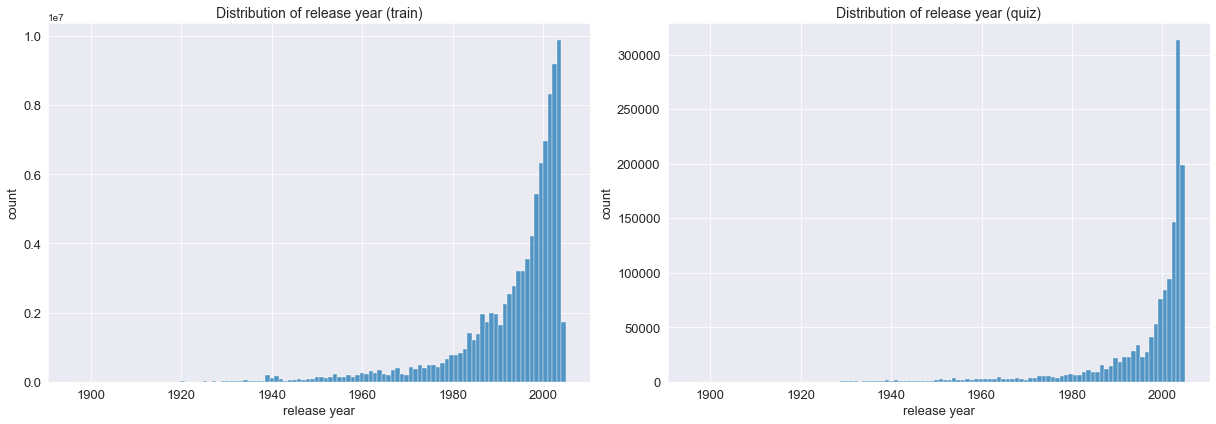

release year stats (quiz): DescribeResult(nobs=1408395, minmax=(1896, 2005), mean=1997.2874484785873, variance=138.79978334931866, skewness=-2.7052807977853686, kurtosis=8.319071704565413)
Wall time: 43.2 s


In [7]:
%%time
sub_plot(train_features.mov_year, 'release year', 'train', 110,
         quiz_features.mov_year, 'release year', 'quiz', 110)

### Feature Transformation: Release Year Squared

release year squared stats (train): DescribeResult(nobs=96304740, minmax=(-31535, 32676), mean=3736.657723773513, variance=241779431.6938418, skewness=-0.4505169586875506, kurtosis=-0.6366405788880019)


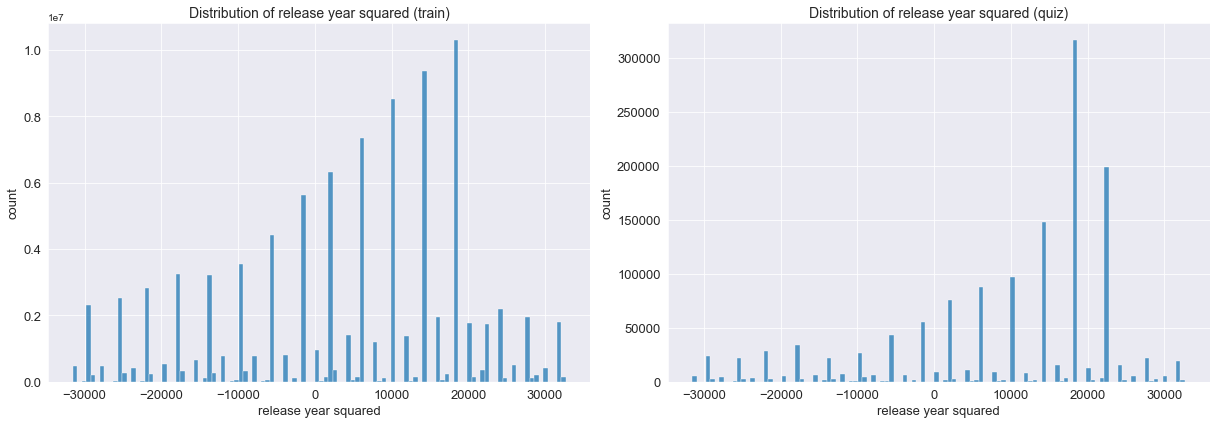

release year squared stats (quiz): DescribeResult(nobs=1408395, minmax=(-31535, 32676), mean=8968.914486347936, variance=214393426.11550593, skewness=-1.0315505428770475, kurtosis=0.2238224523439558)
Wall time: 43.6 s


In [8]:
%%time
tbit_tran = (train_features.mov_year)**2
qbit_tran = (quiz_features.mov_year)**2
sub_plot(tbit_tran, 'release year squared', 'train', 110,
         qbit_tran, 'release year squared', 'quiz', 110)

### Feature Transformation: Release Year Reflected 4th Root (the correct one)

release year reflected 4th root stats (train): DescribeResult(nobs=96304740, minmax=(1.0, 3.238531840464366), mean=1.7227392807734347, variance=0.16658422200502415, skewness=0.5855858852654117, kurtosis=-0.1955867815537018)


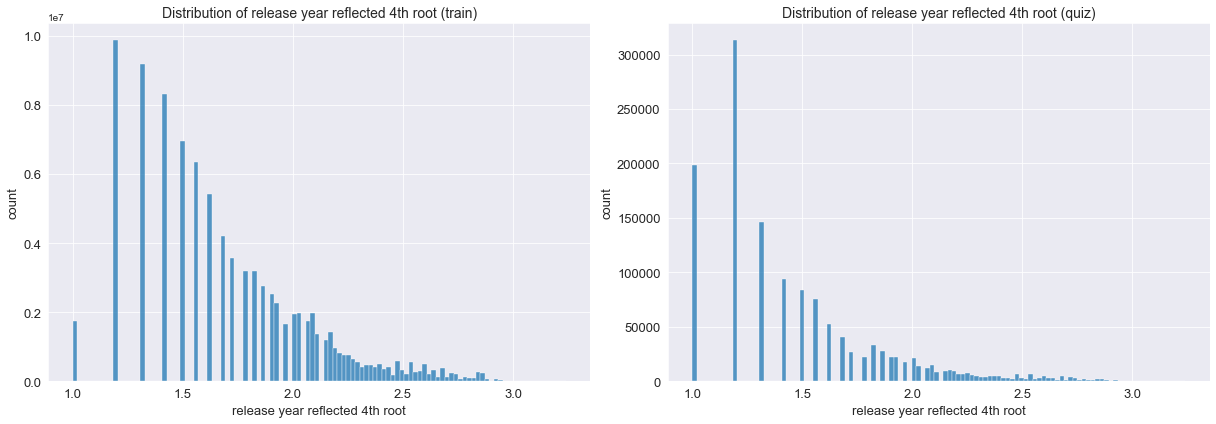

release year reflected 4th root stats (quiz): DescribeResult(nobs=1408395, minmax=(1.0, 3.238531840464366), mean=1.5232444002593064, variance=0.19464630263836188, skewness=0.9460301091513663, kurtosis=0.2752682761601988)
Wall time: 45.7 s


In [9]:
%%time
tyr_4rt = np.power(
    ((train_features.mov_year.astype(np.float32)
      .max() + 1) - train_features.mov_year), 0.25)
qyr_4rt = np.power(
    ((quiz_features.mov_year.astype(np.float32)
      .max() + 1) - quiz_features.mov_year), 0.25)
sub_plot(tyr_4rt, 'release year reflected 4th root', 'train', 110,
         qyr_4rt, 'release year reflected 4th root', 'quiz', 110)

### Feature: Rating Count for Each Movie

rating count stats (train): DescribeResult(nobs=96304740, minmax=(9, 226863), mean=54850.905098689844, variance=2335789293.7938685, skewness=0.8803785017820666, kurtosis=-0.007515906023028762)


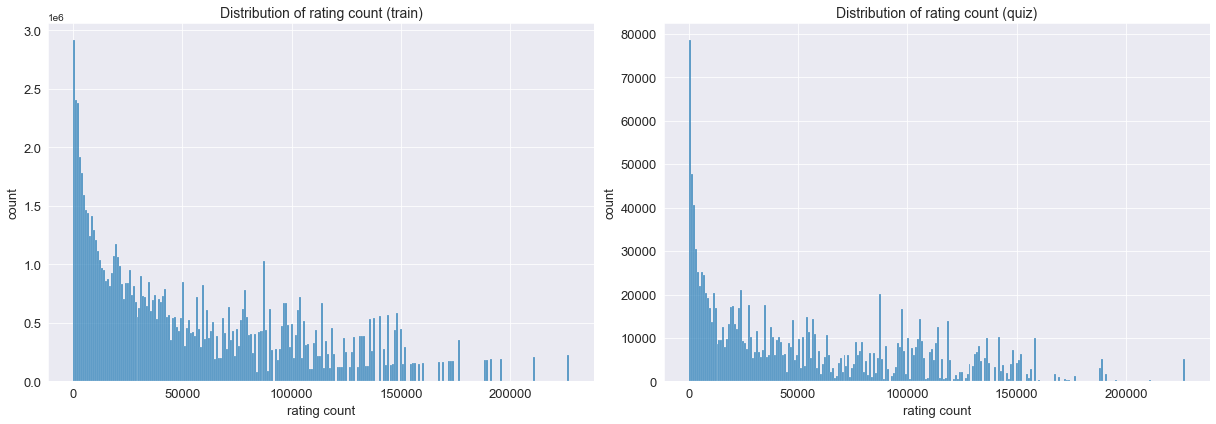

rating count stats (quiz): DescribeResult(nobs=1408395, minmax=(9, 226863), mean=52464.75534278381, variance=2330889660.3893657, skewness=0.8605586110938755, kurtosis=-0.0909215886628556)
Wall time: 46.2 s


In [10]:
%%time
sub_plot(train_features.mov_count, 'rating count', 'train', 250,
         quiz_features.mov_count, 'rating count', 'quiz', 250)

### Feature Transformation: Rating Count for Each Movie Square Root

movie count square root stats (train): DescribeResult(nobs=96304740, minmax=(3.0, 476.30136), mean=207.13803, variance=11944.78, skewness=0.1295502930879593, kurtosis=-0.9792259136198447)


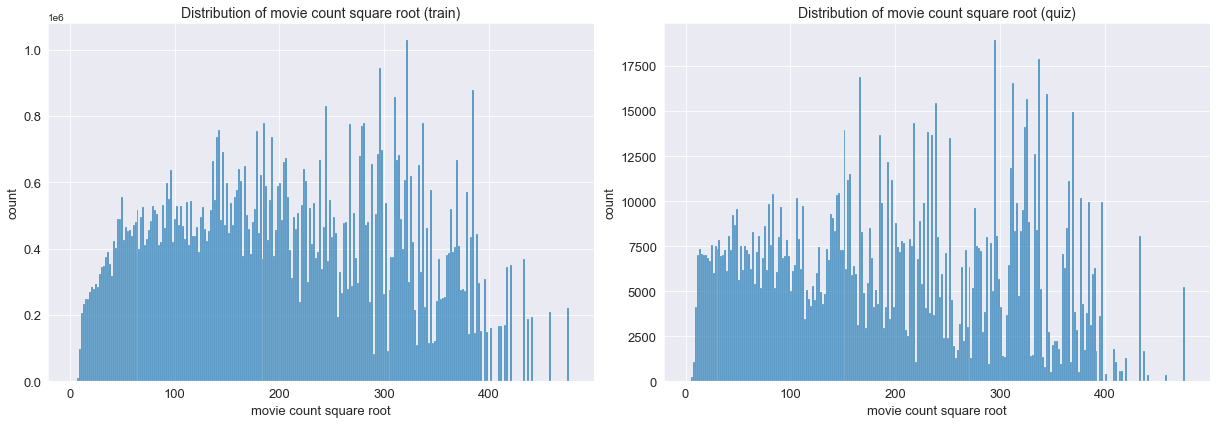

movie count square root stats (quiz): DescribeResult(nobs=1408395, minmax=(3.0, 476.30136), mean=199.04214, variance=12846.992, skewness=0.12279008328914642, kurtosis=-1.0750558829256212)
Wall time: 45.1 s


In [11]:
%%time
tmovct_sqrt = np.sqrt(train_features.mov_count.astype(np.float32))
qmovct_sqrt = np.sqrt(quiz_features.mov_count.astype(np.float32))
sub_plot(tmovct_sqrt, 'movie count square root', 'train', 250,
         qmovct_sqrt, 'movie count square root', 'quiz', 250)

### Feature: Number of Movies Rated by Customer

movies rated by customer stats (train): DescribeResult(nobs=96304740, minmax=(2, 16828), mean=649.0871604969807, variance=608514.3360192347, skewness=8.198138684019023, kurtosis=130.74379425164884)


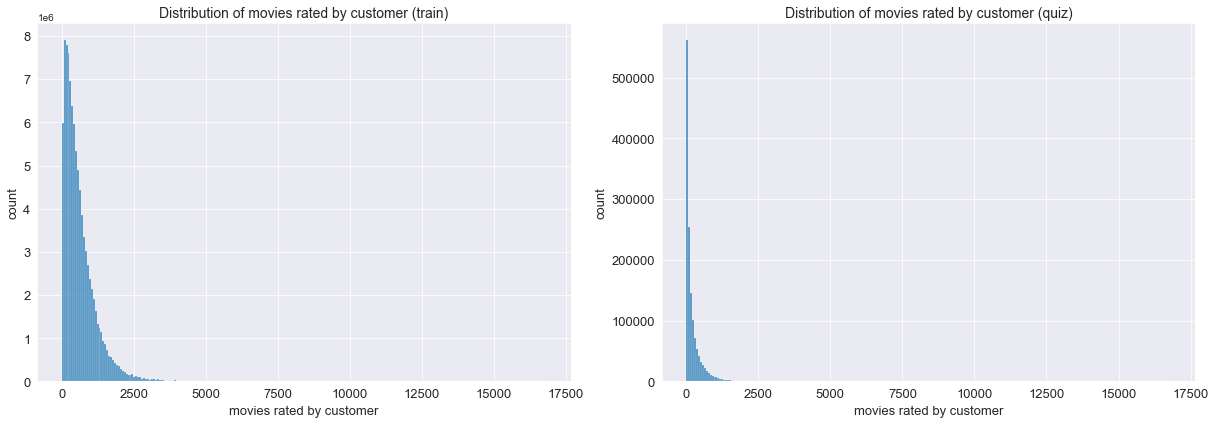

movies rated by customer stats (quiz): DescribeResult(nobs=1408395, minmax=(2, 16828), mean=214.45056535985998, variance=91869.46145392372, skewness=5.258581405217491, kurtosis=109.29224438307598)
Wall time: 44.8 s


In [12]:
%%time
sub_plot(train_features.rated_bycust, 'movies rated by customer', 'train', 250,
         quiz_features.rated_bycust, 'movies rated by customer', 'quiz', 250)

### Feature Transformation: Number of Movies Rated by Customer 4th Root

movies rated by customer 4th root stats (train): DescribeResult(nobs=96304740, minmax=(1.189207115002721, 11.389590920900197), mean=4.648244215748748, variance=1.2886753234383712, skewness=0.3179609453013355, kurtosis=0.9452953752117157)


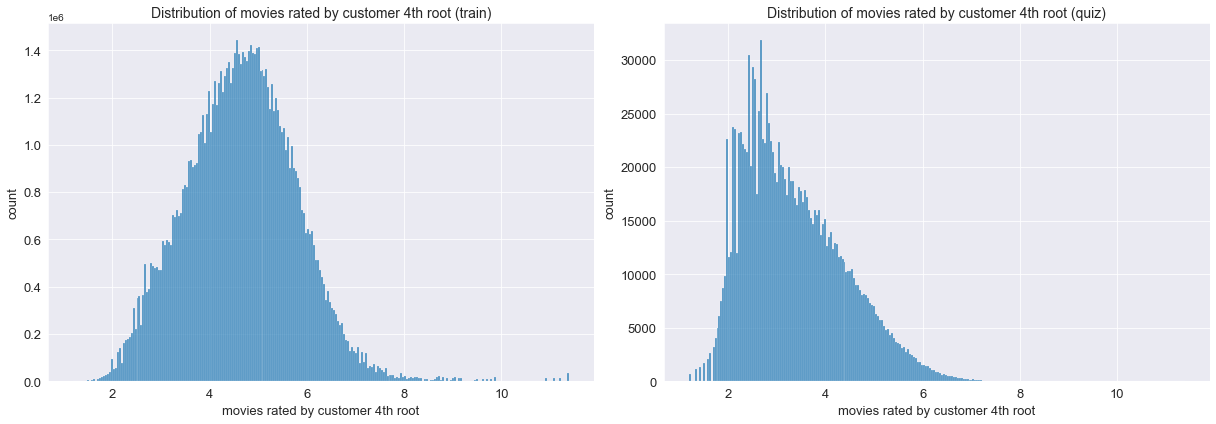

movies rated by customer 4th root stats (quiz): DescribeResult(nobs=1408395, minmax=(1.189207115002721, 11.389590920900197), mean=3.3576512962341525, variance=1.0803518667357126, skewness=0.7064759140037551, kurtosis=0.10043798000822424)
Wall time: 47.7 s


In [13]:
%%time
trbc_4rt = np.power(train_features.rated_bycust.astype(np.float32), 0.25)
qrbc_4rt = np.power(quiz_features.rated_bycust.astype(np.float32), 0.25)
sub_plot(trbc_4rt, 'movies rated by customer 4th root', 'train', 250,
         qrbc_4rt, 'movies rated by customer 4th root', 'quiz', 250)

### Feature Transformation: Number of Movies Rated by Customer Cube Root

movies rated by customer cbrt stats (train): DescribeResult(nobs=96304740, minmax=(1.2599211, 25.625805), mean=7.8604684, variance=6.4728355, skewness=0.6542806625366211, kurtosis=2.0985652061316857)


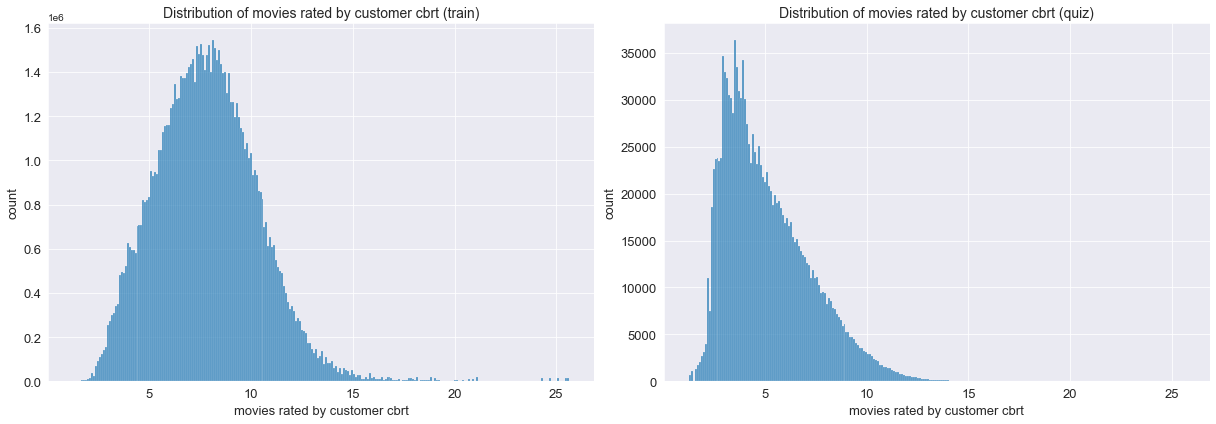

movies rated by customer cbrt stats (quiz): DescribeResult(nobs=1408395, minmax=(1.2599211, 25.625805), mean=5.132101, variance=4.5592203, skewness=0.9331231713294983, kurtosis=0.7229899336638623)
Wall time: 48.5 s


In [14]:
%%time
trbc_3rt = np.cbrt(train_features.rated_bycust.astype(np.float32))
qrbc_3rt = np.cbrt(quiz_features.rated_bycust.astype(np.float32))
sub_plot(trbc_3rt, 'movies rated by customer cbrt', 'train', 250,
         qrbc_3rt, 'movies rated by customer cbrt', 'quiz', 250)

### Feature: Total Ratings per Day

total ratings per day stats (train): DescribeResult(nobs=96304740, minmax=(5, 720093), mean=117684.00313792446, variance=6468392997.974606, skewness=3.06720766428303, kurtosis=21.2318880521485)


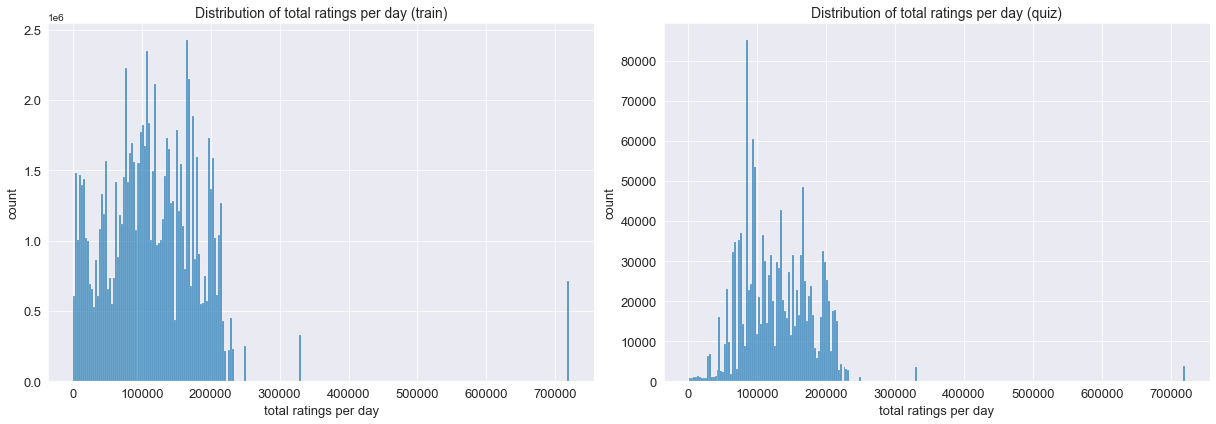

total ratings per day stats (quiz): DescribeResult(nobs=1408395, minmax=(1169, 720093), mean=129886.30986193503, variance=3364206074.9320636, skewness=2.9851677842789344, kurtosis=27.655509523828258)
Wall time: 45.2 s


In [15]:
%%time
sub_plot(train_features.rate_each_day, 'total ratings per day', 'train', 250,
         quiz_features.rate_each_day, 'total ratings per day', 'quiz', 250)

### Feature: Total Ratings per Day (Outliers Adjusted)

In [16]:
red_list = list(train_features.rate_each_day.unique())
red_list.sort(reverse=True)
red_list[0:5]

[720093, 330510, 249513, 231956, 230367]

In [17]:
red_list = list(quiz_features.rate_each_day.unique())
red_list.sort(reverse=True)
red_list[0:5]

[720093, 330510, 249513, 231956, 230367]

total ratings per day (outlier adjusted) stats (train): DescribeResult(nobs=96304740, minmax=(5, 249513), mean=113082.11182324983, variance=3635417522.2039337, skewness=-0.04430965958122818, kurtosis=-0.9547383494881929)


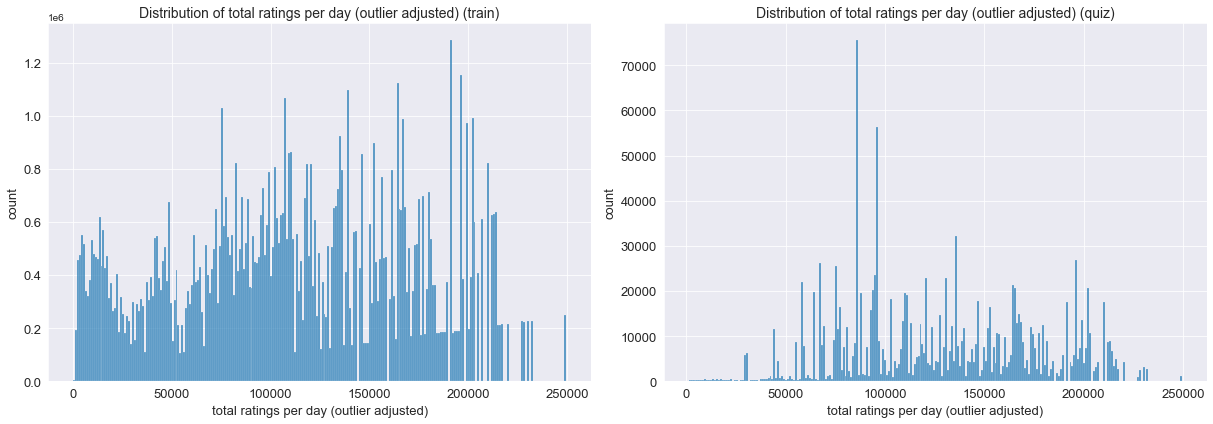

total ratings per day (outlier adjusted) stats (quiz): DescribeResult(nobs=1408395, minmax=(1169, 249513), mean=127926.10751742231, variance=2313631854.128589, skewness=0.1257229069317168, kurtosis=-0.8784108263762027)
Wall time: 45.8 s


In [7]:
# %%time
# train_features.rate_each_day = train_features.rate_each_day.replace(720093, 191000)
# quiz_features.rate_each_day = quiz_features.rate_each_day.replace(720093, 191000)
# train_features.rate_each_day = train_features.rate_each_day.replace(330510, 134000)
# quiz_features.rate_each_day = quiz_features.rate_each_day.replace(330510, 134000)
# 
# sub_plot(train_features.rate_each_day, 'total ratings per day (outlier adjusted)',
#          'train', 250, quiz_features.rate_each_day,
#          'total ratings per day (outlier adjusted)', 'quiz', 250)

### Feature: Ratings per Movie per Day

ratings per movie per day stats (train): DescribeResult(nobs=96304740, minmax=(1, 32364), mean=135.64407466340703, variance=452079.5579651012, skewness=37.77571590383334, kurtosis=1741.6837767478485)


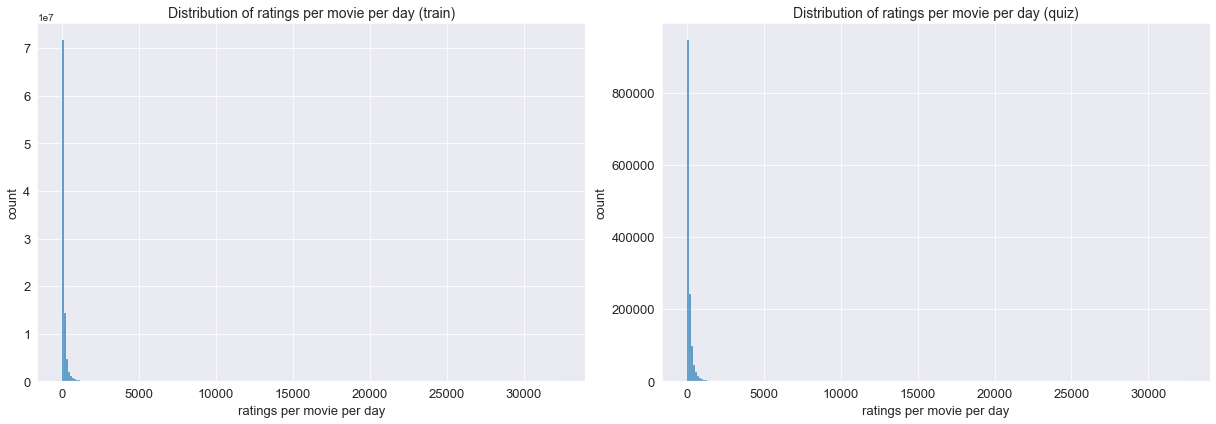

ratings per movie per day stats (quiz): DescribeResult(nobs=1408395, minmax=(1, 32364), mean=184.22940581299991, variance=827450.0211534265, skewness=28.199983447457907, kurtosis=956.7278010808401)
Wall time: 44.1 s


In [18]:
%%time
sub_plot(train_features.mov_day_count, 'ratings per movie per day', 'train', 250,
         quiz_features.mov_day_count, 'ratings per movie per day', 'quiz', 250)

### Feature: Outlier Adjusted Ratings per Movie per Day

In [9]:
tmdc_list = list(train_features.mov_day_count.unique())
tmdc_list.sort(reverse=True)
tmdc_list[0:5]

[32364, 9586, 8471, 8129, 7700]

In [10]:
qmdc_list = list(quiz_features.mov_day_count.unique())
qmdc_list.sort(reverse=True)
qmdc_list[0:5]

[32364, 9586, 8471, 8129, 7700]

ratings per movie per day stats (train): DescribeResult(nobs=96304740, minmax=(1, 11111), mean=128.69029409144346, variance=151602.06767686733, skewness=16.359132410491064, kurtosis=360.88100516782384)


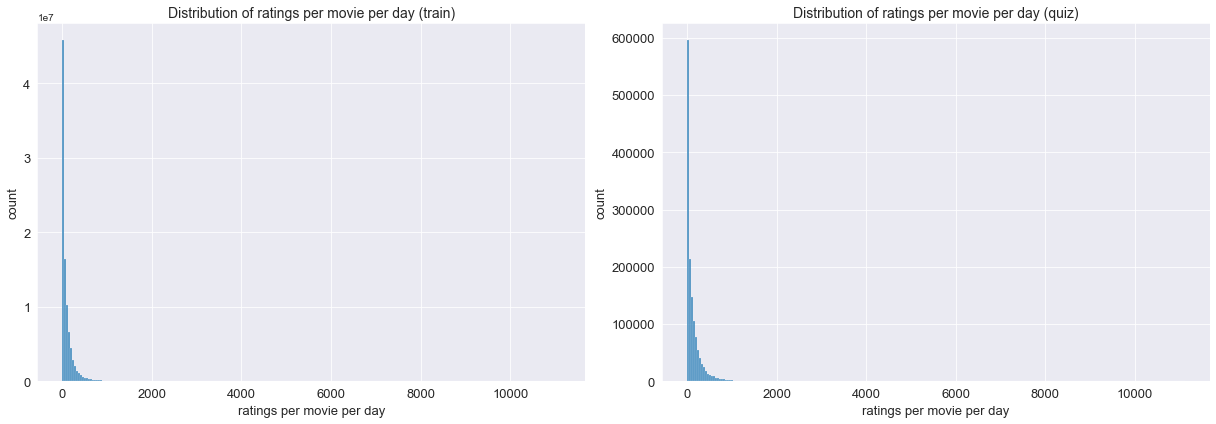

ratings per movie per day stats (quiz): DescribeResult(nobs=1408395, minmax=(1, 11111), mean=171.34235211002596, variance=271767.2392058688, skewness=12.854241779549895, kurtosis=208.3448203020327)
Wall time: 43.6 s


In [11]:
# %%time
# train_features.mov_day_count = train_features.mov_day_count.replace(32364, 11111)
# quiz_features.mov_day_count = quiz_features.mov_day_count.replace(32364, 11111)

# sub_plot(train_features.mov_day_count, 'outlier adjusted ratings per movie per day', 'train', 250,
#          quiz_features.mov_day_count, 'outlier adjusted ratings per movie per day', 'quiz', 250)

### Feature Transformation: Outlier Adjusted Ratings per Movie per Day 4th Root

ratings per movie per day 4th root stats (train): DescribeResult(nobs=96304740, minmax=(1.0, 10.266875293454754), mean=2.7440303955613845, variance=1.1483253373452142, skewness=0.9367536970946371, kurtosis=2.6589749493949366)


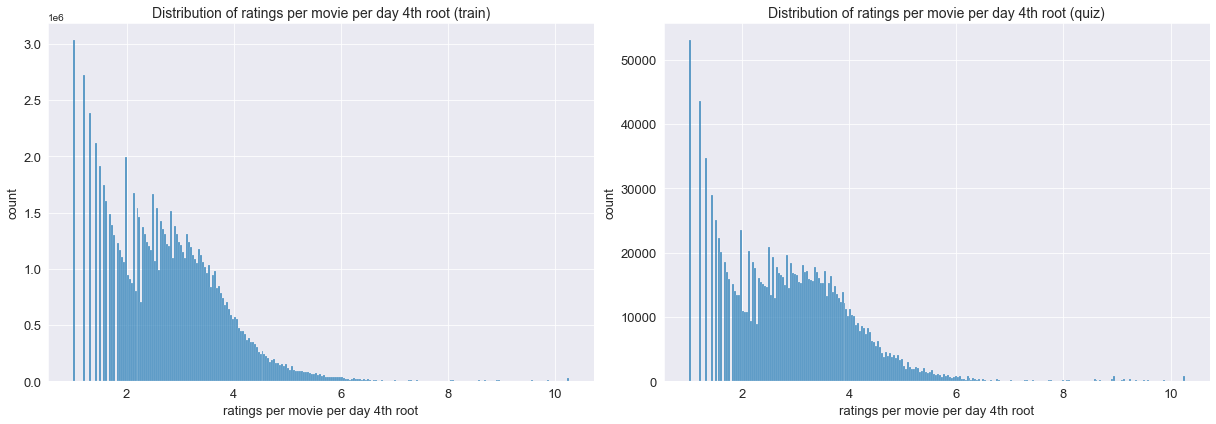

ratings per movie per day 4th root stats (quiz): DescribeResult(nobs=1408395, minmax=(1.0, 10.266875293454754), mean=2.900061294237901, variance=1.422167237615166, skewness=0.8961449597071063, kurtosis=2.543465230719585)
Wall time: 47.6 s


In [12]:
# %%time
# tmov_dayct_tran = np.power(train_features.mov_day_count.astype(np.float32), 0.25)
# qmov_dayct_tran = np.power(quiz_features.mov_day_count.astype(np.float32), 0.25)
# sub_plot(tmov_dayct_tran, 'ratings per movie per day 4th root', 'train', 250,
#          qmov_dayct_tran, 'ratings per movie per day 4th root', 'quiz', 250)

### Feature Transformation: Outlier Adjusted Log Ratings per Movie per Day

log ratings per movie per day stats (train): DescribeResult(nobs=96304740, minmax=(0.0, 9.315691), mean=3.728336, variance=2.5867338, skewness=-0.31237855553627014, kurtosis=-0.23344661358437513)


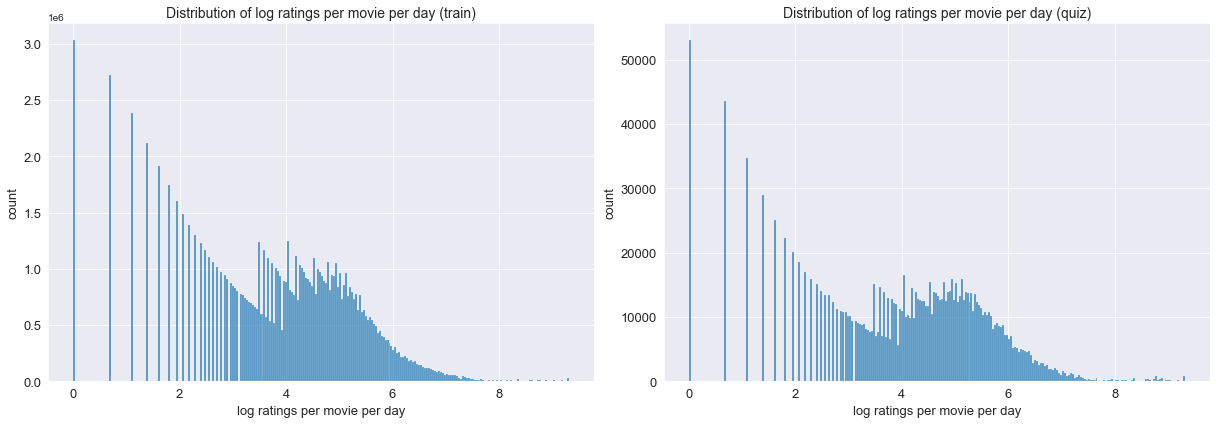

log ratings per movie per day stats (quiz): DescribeResult(nobs=1408395, minmax=(0.0, 9.315691), mean=3.906949, variance=2.991023, skewness=-0.3948965072631836, kurtosis=-0.2863335424526552)
Wall time: 45.8 s


In [13]:
# %%time
# tmov_dayct_tran = np.log(train_features.mov_day_count.astype(np.float32))
# qmov_dayct_tran = np.log(quiz_features.mov_day_count.astype(np.float32))
# sub_plot(tmov_dayct_tran, 'log ratings per movie per day', 'train', 250,
#          qmov_dayct_tran, 'log ratings per movie per day', 'quiz', 250)

### Feature: Ratings per Customer per Day

ratings per customer per day stats (train): DescribeResult(nobs=96304740, minmax=(1, 5172), mean=76.95850069269696, variance=20136.46649391466, skewness=7.7797920178567885, kurtosis=152.19504882794953)


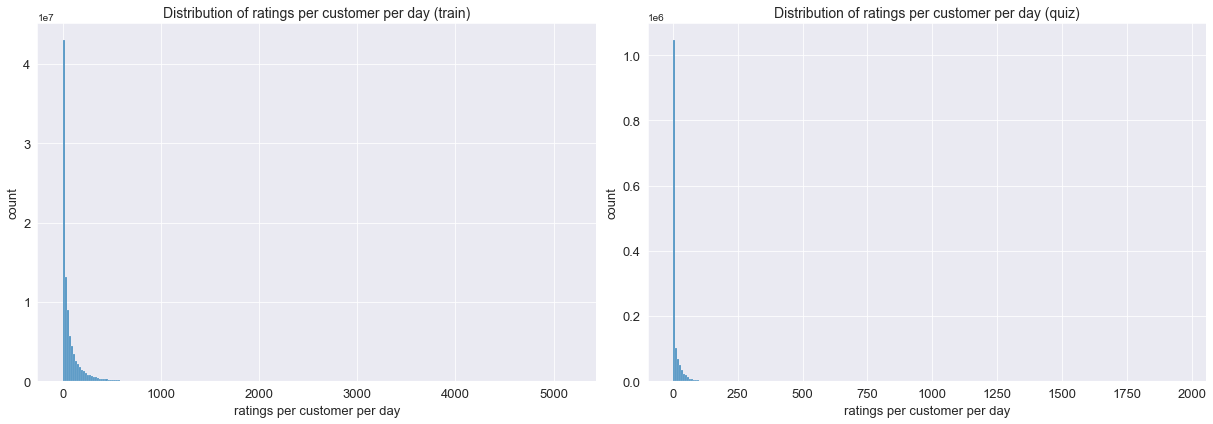

ratings per customer per day stats (quiz): DescribeResult(nobs=1408395, minmax=(1, 1957), mean=11.488719428853411, variance=823.2744342349692, skewness=9.528791002260467, kurtosis=211.86318665704133)
Wall time: 43.2 s


In [19]:
%%time
sub_plot(train_features.cust_day_count, 'ratings per customer per day', 'train', 250,
         quiz_features.cust_day_count, 'ratings per customer per day', 'quiz', 250)

### Feature: Outlier Adjusted Ratings per Customer per Day

In [20]:
tcdc_list = list(train_features.cust_day_count.unique())
tcdc_list.sort(reverse=True)
tcdc_list[0:5]

[5172, 3472, 3253, 2962, 2797]

In [21]:
qcdc_list = list(quiz_features.cust_day_count.unique())
qcdc_list.sort(reverse=True)
qcdc_list[0:5]

[1957, 1623, 1606, 1371, 1343]

ratings per customer per day stats (train): DescribeResult(nobs=96304740, minmax=(1, 3711), mean=76.88003838648025, variance=19451.556347240923, skewness=6.52771492229436, kurtosis=92.43446754364068)


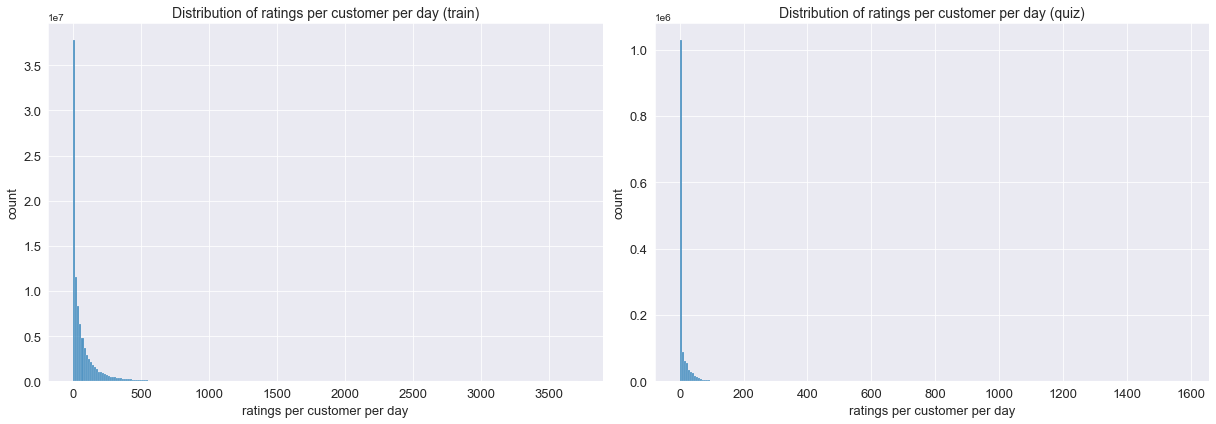

ratings per customer per day stats (quiz): DescribeResult(nobs=1408395, minmax=(1, 1579), mean=11.487774381476788, variance=820.3029196682088, skewness=9.280102321036063, kurtosis=191.06337161978323)
Wall time: 43.9 s


In [22]:
%%time
train_features.cust_day_count = train_features.cust_day_count.replace(5172, 3711)
quiz_features.cust_day_count = quiz_features.cust_day_count.replace(1957, 1579)
quiz_features.cust_day_count = quiz_features.cust_day_count.replace(1623, 1494)
quiz_features.cust_day_count = quiz_features.cust_day_count.replace(1606, 1400)

sub_plot(train_features.cust_day_count, 'ratings per customer per day', 'train', 250,
         quiz_features.cust_day_count, 'ratings per customer per day', 'quiz', 250)

### Feature Transformation: Outlier Adjusted Ratings per Customer per Day 4th Root

ratings per customer per day 4th root stats (train): DescribeResult(nobs=96304740, minmax=(1.0, 7.8049969661795595), mean=2.397728792699325, variance=1.0160880217113848, skewness=0.5871232288198487, kurtosis=-0.08379065330995727)


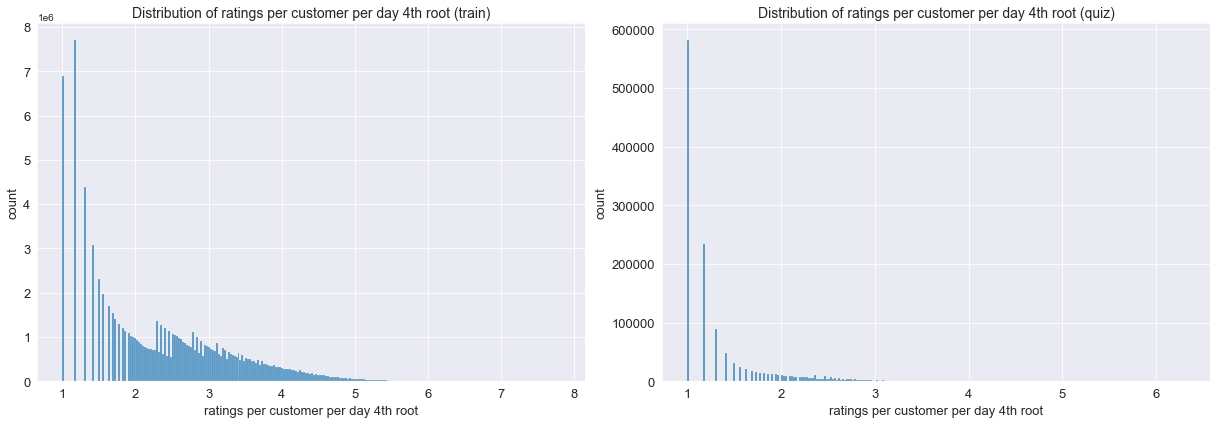

ratings per customer per day 4th root stats (quiz): DescribeResult(nobs=1408395, minmax=(1.0, 6.303699943097788), mean=1.4482381006776823, variance=0.3579086375183019, skewness=1.5518622196738967, kurtosis=2.1503665168980053)
Wall time: 47.4 s


In [23]:
%%time
tcdc_4rt = np.power(train_features.cust_day_count.astype(np.float32), 0.25)
qcdc_4rt = np.power(quiz_features.cust_day_count.astype(np.float32), 0.25)
sub_plot(tcdc_4rt, 'ratings per customer per day 4th root', 'train', 250,
         qcdc_4rt, 'ratings per customer per day 4th root', 'quiz', 250)

### Feature Transformation: Log Ratings per Customer per Day

log ratings per customer per day stats (train): DescribeResult(nobs=96304740, minmax=(0.0, 8.219057), mean=3.131067, variance=3.05194, skewness=-0.1718614399433136, kurtosis=-0.9378563133491822)


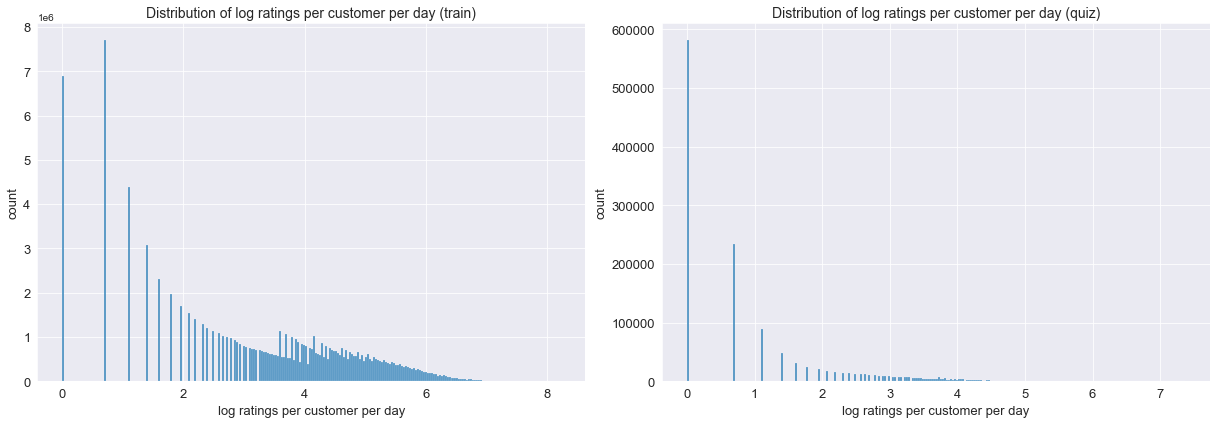

log ratings per customer per day stats (quiz): DescribeResult(nobs=1408395, minmax=(0.0, 7.364547), mean=1.2082497, variance=1.9704983, skewness=0.9761646389961243, kurtosis=-0.19675345979672487)
Wall time: 44.6 s


In [24]:
%%time
tcdc_log = np.log(train_features.cust_day_count.astype(np.float32))
qcdc_log = np.log(quiz_features.cust_day_count.astype(np.float32))
sub_plot(tcdc_log, 'log ratings per customer per day', 'train', 250,
         qcdc_log, 'log ratings per customer per day', 'quiz', 250)

### Feature: Days Since Customer's First Rating

days since first rating per customer stats (train): DescribeResult(nobs=96304740, minmax=(0, 2187), mean=266.8308172889517, variance=122022.94523760329, skewness=1.8970016652999562, kurtosis=3.826952201579812)


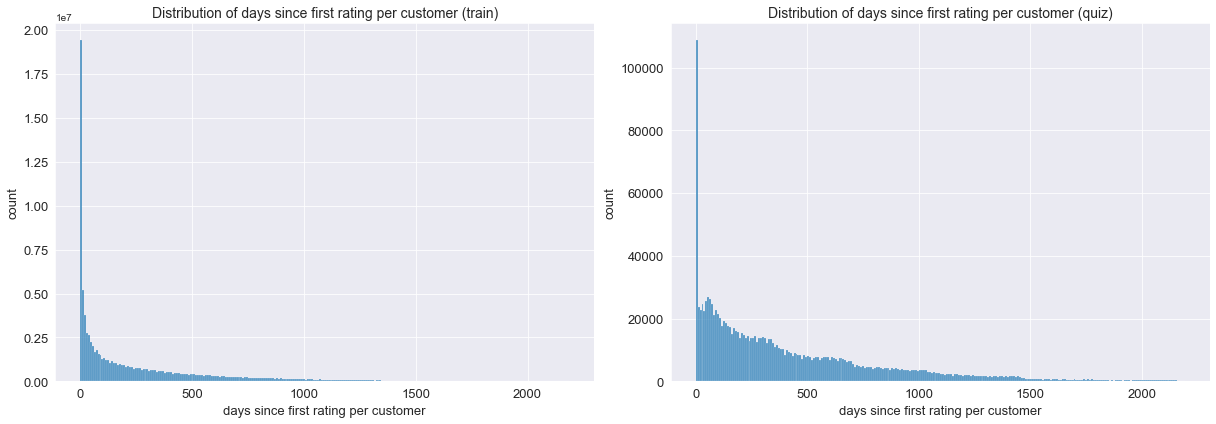

days since first rating per customer stats (quiz): DescribeResult(nobs=1408395, minmax=(0, 2195), mean=423.8160153934088, variance=177719.50143238093, skewness=1.415697699803493, kurtosis=1.8809949504407202)
Wall time: 45.3 s


In [25]:
%%time
sub_plot(train_features.cust_days_since,
         'days since first rating per customer',
         'train', 250, quiz_features.cust_days_since,
         'days since first rating per customer', 'quiz', 250)

### Feature: Days Since Movie's First Rating

days since first rating per movie stats (train): DescribeResult(nobs=96304740, minmax=(0, 2240), mean=1086.989800159369, variance=420410.52094790305, skewness=0.042318033882918764, kurtosis=-1.3939229757819263)


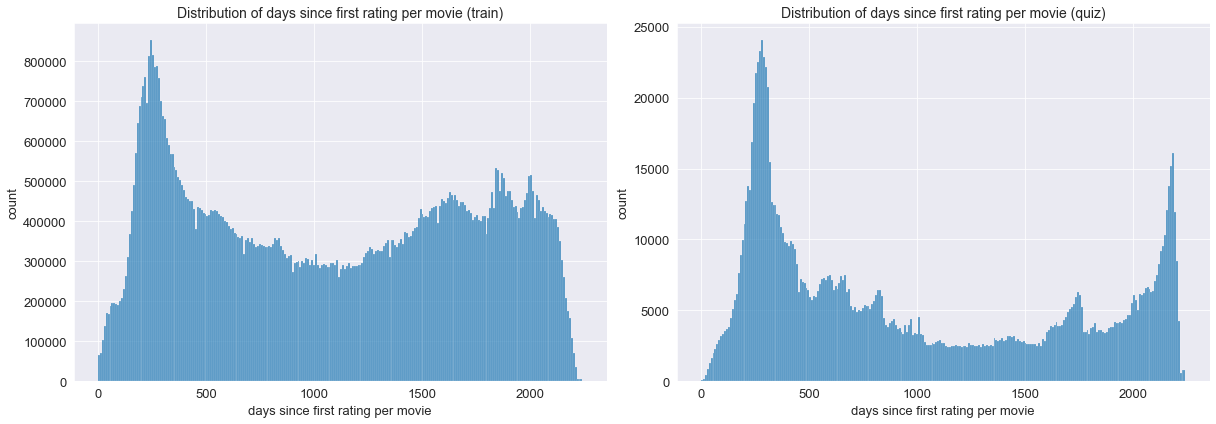

days since first rating per movie stats (quiz): DescribeResult(nobs=1408395, minmax=(0, 2240), mean=983.3421178007591, variance=496446.53733826283, skewness=0.46475892211037656, kurtosis=-1.3157312663962175)
Wall time: 45.4 s


In [26]:
%%time
sub_plot(train_features.mov_days_since,
         'days since first rating per movie',
         'train', 250, quiz_features.mov_days_since,
         'days since first rating per movie', 'quiz', 250)

### Feature: Customer Average Rating

customer avg rating stats (train): DescribeResult(nobs=96304740, minmax=(1.0, 5.0), mean=3.6044092, variance=0.19093151, skewness=-0.2226431518793106, kurtosis=1.162098842638045)


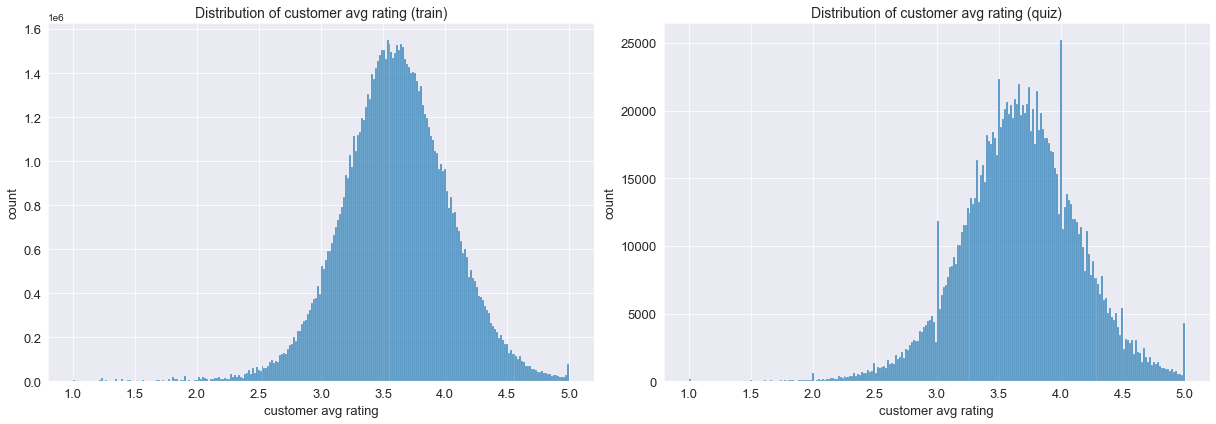

customer avg rating stats (quiz): DescribeResult(nobs=1408395, minmax=(1.0, 5.0), mean=3.6752832, variance=0.21858592, skewness=-0.1846098154783249, kurtosis=0.7551331574451527)
Wall time: 46.3 s


In [27]:
%%time
sub_plot(train_features.cust_avg_rating,
         'customer avg rating',
         'train', 250, quiz_features.cust_avg_rating,
         'customer avg rating', 'quiz', 250)

### Feature: Average Rating per Movie per Day

movie avg rating per day stats (train): DescribeResult(nobs=96304740, minmax=(1.0, 5.0), mean=3.6044042, variance=0.2738005, skewness=-0.8206157088279724, kurtosis=2.7192582477747393)


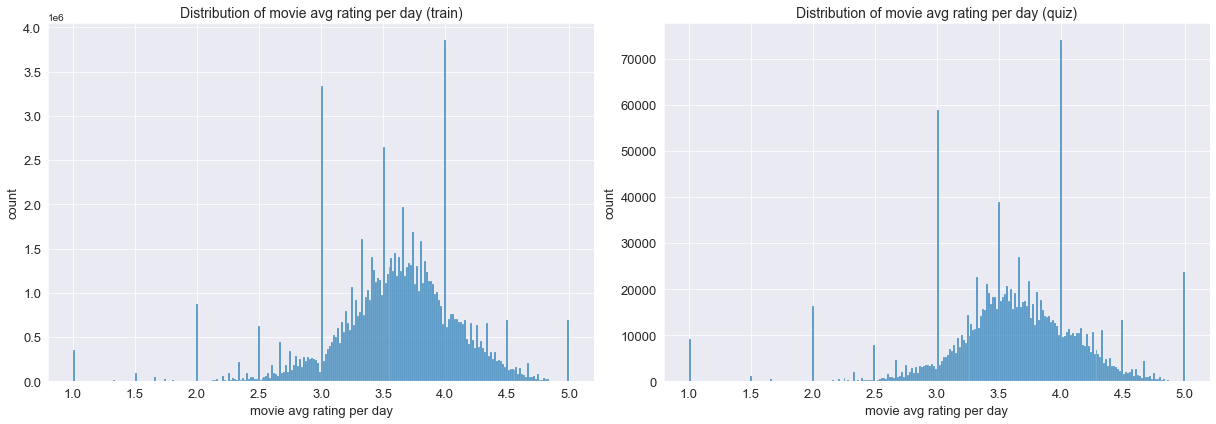

movie avg rating per day stats (quiz): DescribeResult(nobs=1408395, minmax=(1.0, 5.0), mean=3.6309245, variance=0.3086374, skewness=-0.8354570269584656, kurtosis=3.3087366509350726)
Wall time: 45.4 s


In [28]:
%%time
sub_plot(train_features.mov_day_avg,
         'movie avg rating per day',
         'train', 250, quiz_features.mov_day_avg,
         'movie avg rating per day', 'quiz', 250)

### Feature: Average Rating per Customer per Day

customer avg rating per day stats (train): DescribeResult(nobs=96304740, minmax=(1.0, 5.0), mean=3.6044056, variance=0.43171424, skewness=-0.5121365189552307, kurtosis=1.2291059075477673)


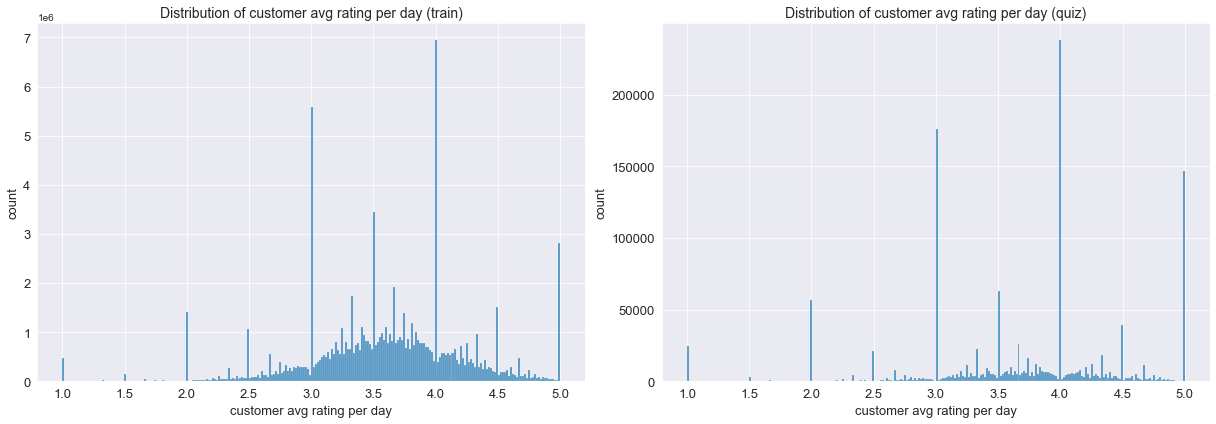

customer avg rating per day stats (quiz): DescribeResult(nobs=1408395, minmax=(1.0, 5.0), mean=3.6835341, variance=0.71381027, skewness=-0.650515615940094, kurtosis=0.6798019550275982)
Wall time: 44.6 s


In [29]:
%%time
sub_plot(train_features.cust_day_avg,
         'customer avg rating per day',
         'train', 250, quiz_features.cust_day_avg,
         'customer avg rating per day', 'quiz', 250)

### Feature: Average Rating per Movie Release Year

avg rating per release year stats (train): DescribeResult(nobs=96304740, minmax=(2.776699, 4.0307565), mean=3.6044717, variance=0.010075428, skewness=1.2530529499053955, kurtosis=1.49865153472554)


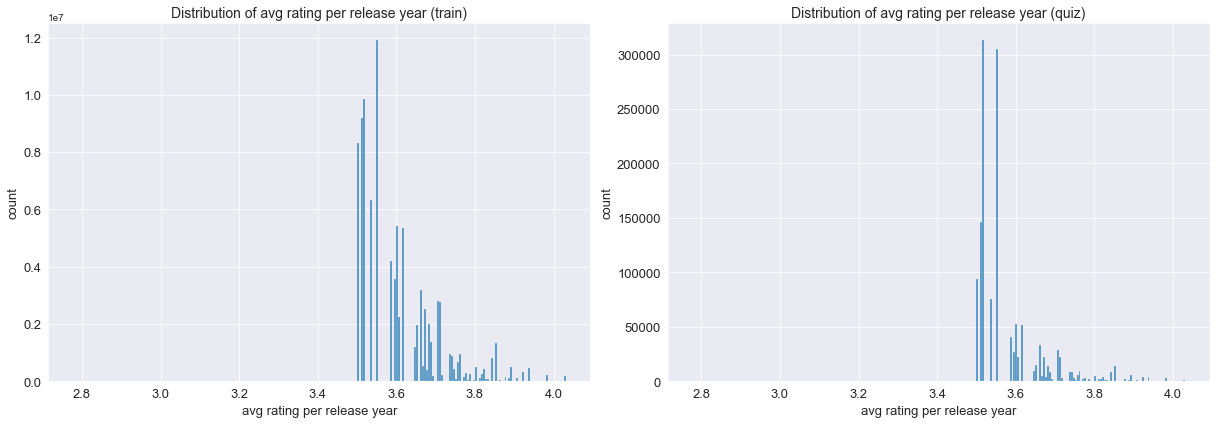

avg rating per release year stats (quiz): DescribeResult(nobs=1408395, minmax=(2.776699, 4.0307565), mean=3.5787623, variance=0.008435177, skewness=1.8610049486160278, kurtosis=3.5619377527748384)
Wall time: 43.2 s


In [30]:
%%time
sub_plot(train_features.avg_rate_mov_yr,
         'avg rating per release year',
         'train', 250, quiz_features.avg_rate_mov_yr,
         'avg rating per release year', 'quiz', 250)

### Feature Transformation: Average Rating per Release Year Cube Root

avg rating per release year cbrt stats (train): DescribeResult(nobs=96304740, minmax=(1.405539, 1.5914593), mean=1.5331655, variance=0.00019815873, skewness=1.192217469215393, kurtosis=1.3070214076061832)


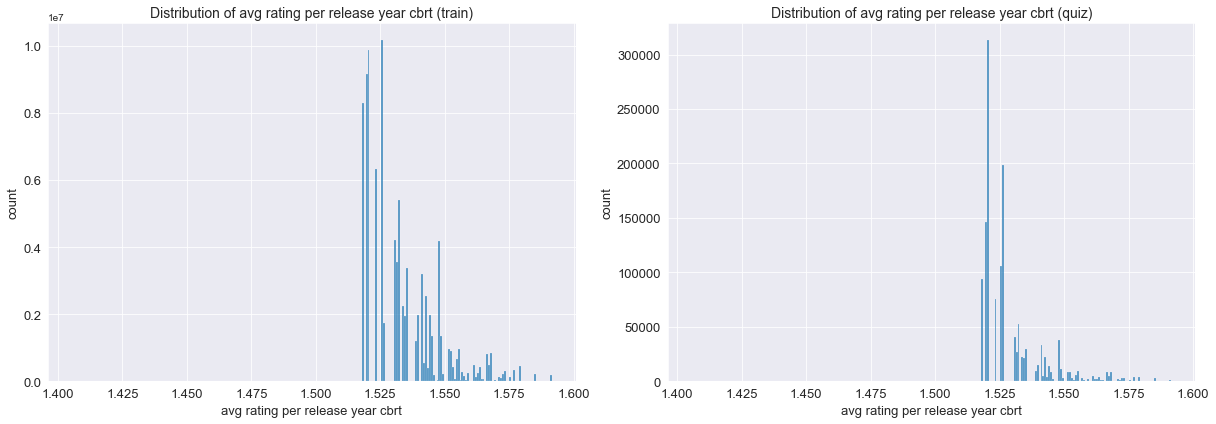

avg rating per release year cbrt stats (quiz): DescribeResult(nobs=1408395, minmax=(1.405539, 1.5914593), mean=1.5294904, variance=0.00016608613, skewness=1.8091808557510376, kurtosis=3.3191097796582696)
Wall time: 45.8 s


In [31]:
%%time
tarmy_3rt = np.cbrt(train_features.avg_rate_mov_yr)
qarmy_3rt = np.cbrt(quiz_features.avg_rate_mov_yr)
sub_plot(tarmy_3rt, 'avg rating per release year cbrt', 'train', 250,
         qarmy_3rt, 'avg rating per release year cbrt', 'quiz', 250)

### Feature: Average Rating per Customer per Release Year

avg rating per customer per release year stats (train): DescribeResult(nobs=96304740, minmax=(1.0, 5.0), mean=3.6044073, variance=0.3476854, skewness=-0.17273449897766113, kurtosis=1.0580972244473115)


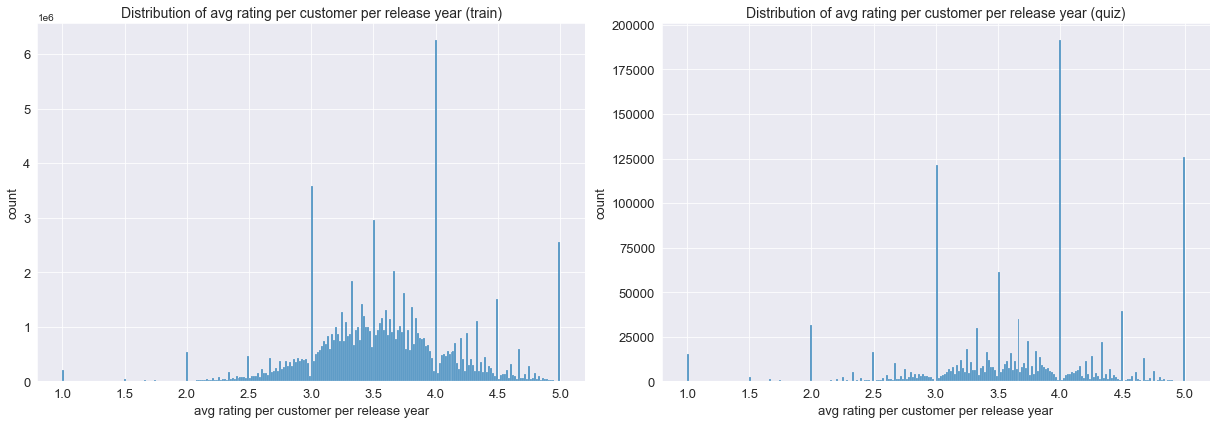

avg rating per customer per release year stats (quiz): DescribeResult(nobs=1408395, minmax=(1.0, 5.0), mean=3.6679895, variance=0.58104056, skewness=-0.45468661189079285, kurtosis=0.8640173092487609)
Wall time: 44.9 s


In [32]:
%%time
sub_plot(train_features.avg_rate_cst_yr,
         'avg rating per customer per release year',
         'train', 250, quiz_features.avg_rate_cst_yr,
         'avg rating per customer per release year', 'quiz', 250)

### Feature: Principal Component from Engineered Customer Features

principal component from customer features stats (train): DescribeResult(nobs=96304740, minmax=(-4.3986545, 7.0778437), mean=4.816541e-09, variance=1.0004728, skewness=0.1262417584657669, kurtosis=1.1281437662985594)


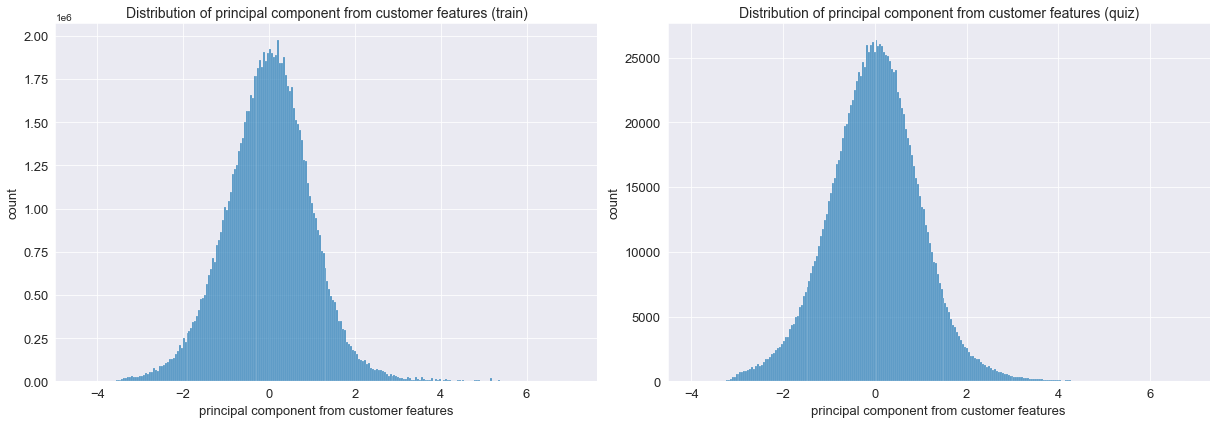

principal component from customer features stats (quiz): DescribeResult(nobs=1408395, minmax=(-3.9789398, 6.755478), mean=-5.44417e-09, variance=1.0000019, skewness=0.132137268781662, kurtosis=0.8566623767264474)
Wall time: 45.4 s


In [33]:
%%time
sub_plot(train_features.cust_pc,
         'principal component from customer features',
         'train', 250, quiz_features.cust_pc,
         'principal component from customer features', 'quiz', 250)

### Feature: Principal Components from Engineered Movie Features

Below is the initial result of combining three highly correlated movie-related variables into a single component. Notice the extreme kurtosis in the training set component. After seeing this, I repeated the PCA procedure 3 more times, leaving out one of the variables in each pass. Those results will follow this first plot.

principal component from movie features stats (train): DescribeResult(nobs=96304740, minmax=(-5.9287357, 227.0379), mean=3.403046e-06, variance=1.0018836, skewness=-0.1535082906484604, kurtosis=30.387819208064442)


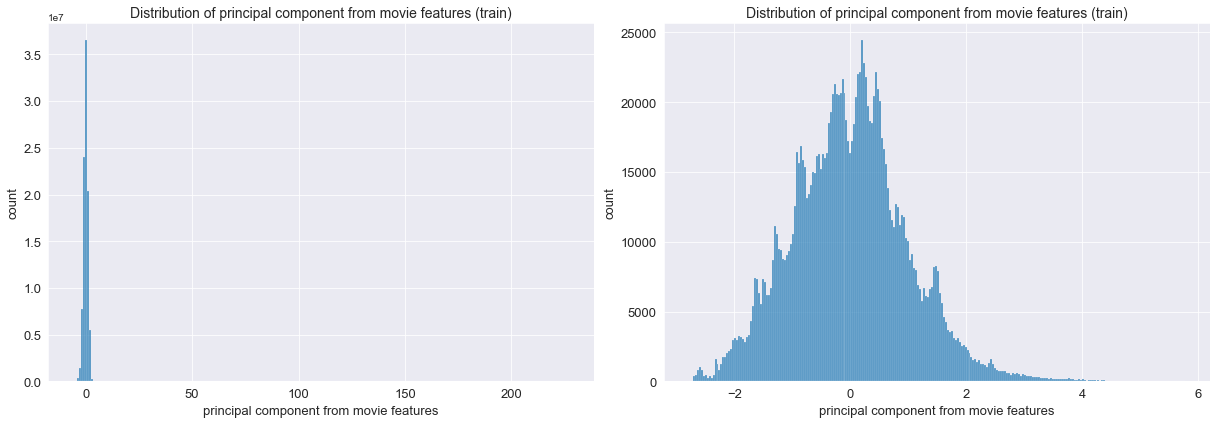

principal component from movie features stats (train): DescribeResult(nobs=1408395, minmax=(-2.7897627, 5.773663), mean=4.4057145e-08, variance=1.0, skewness=0.3409249782562256, kurtosis=0.6482634281093453)
Wall time: 45.2 s


In [34]:
%%time
sub_plot(mov_pcs_train.mov_pc_all,
         'principal component from movie features',
         'train', 250, quiz_features.mov_pc,
         'principal component from movie features', 'train', 250)

principal component from movie features stats (train): DescribeResult(nobs=96304740, minmax=(-5.8831854, 179.66882), mean=1.8651546e-06, variance=1.0012065, skewness=-0.16480913758277893, kurtosis=11.300166298408245)


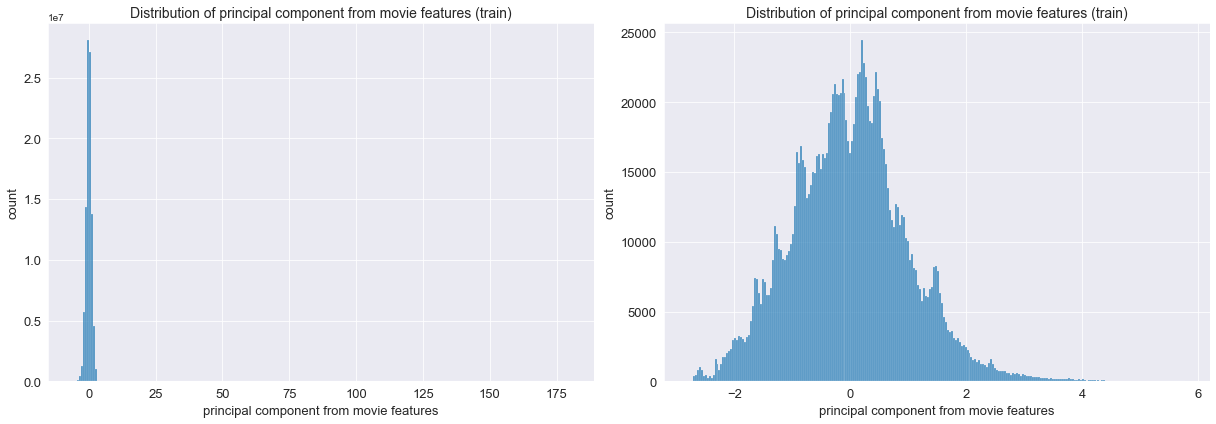

principal component from movie features stats (train): DescribeResult(nobs=1408395, minmax=(-2.7897627, 5.773663), mean=4.4057145e-08, variance=1.0, skewness=0.3409249782562256, kurtosis=0.6482634281093453)
Wall time: 44.7 s


In [35]:
%%time
sub_plot(mov_pcs_train.mov_pc_no_rl,
         'principal component from movie features',
         'train', 250, quiz_features.mov_pc,
         'principal component from movie features', 'train', 250)

principal component from movie features stats (train): DescribeResult(nobs=96304740, minmax=(-2.9478495, 5.8038645), mean=5.858936e-09, variance=1.0005296, skewness=0.40827253460884094, kurtosis=0.8547775001514033)


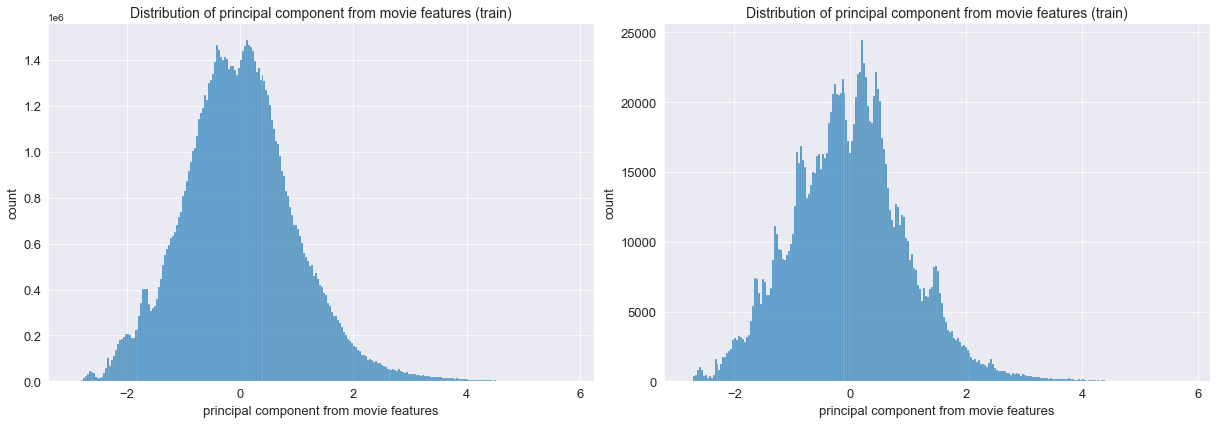

principal component from movie features stats (train): DescribeResult(nobs=1408395, minmax=(-2.7897627, 5.773663), mean=4.4057145e-08, variance=1.0, skewness=0.3409249782562256, kurtosis=0.6482634281093453)
Wall time: 45.5 s


In [36]:
%%time
sub_plot(mov_pcs_train.mov_pc_no_mar,
         'principal component from movie features',
         'train', 250, quiz_features.mov_pc,
         'principal component from movie features', 'train', 250)

principal component from movie features stats (train): DescribeResult(nobs=96304740, minmax=(-2.947867, 5.803867), mean=7.513415e-09, variance=1.0005493, skewness=0.40831467509269714, kurtosis=0.8548738628423904)


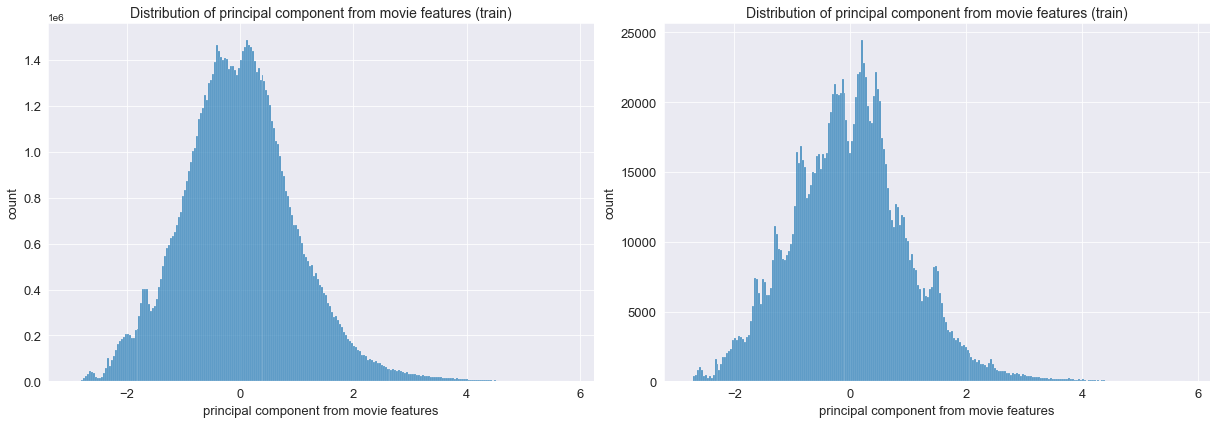

principal component from movie features stats (train): DescribeResult(nobs=1408395, minmax=(-2.7897627, 5.773663), mean=4.4057145e-08, variance=1.0, skewness=0.3409249782562256, kurtosis=0.6482634281093453)
Wall time: 45.4 s


In [37]:
%%time
sub_plot(mov_pcs_train.mov_pc_no_mgd,
         'principal component from movie features',
         'train', 250, quiz_features.mov_pc,
         'principal component from movie features', 'train', 250)

In [55]:
%%time
# create training df of transformed variables
train_trans = pd.DataFrame({'tbit_tran': tbit_tran, 'tyr_4rt': tyr_4rt,
                            'tmovct_sqrt': tmovct_sqrt, 'trbc_4rt': trbc_4rt,
                            'trbc_3rt': trbc_3rt, 'tcdc_4rt': tcdc_4rt,
                            'tcdc_log': tcdc_log, 'tarmy_3rt': tarmy_3rt})

Wall time: 4.06 s


In [56]:
%%time
# create quiz df of transformed variables
quiz_trans = pd.DataFrame({'qbit_tran': qbit_tran, 'qyr_4rt': qyr_4rt,
                           'qmovct_sqrt': qmovct_sqrt, 'qrbc_4rt': qrbc_4rt,
                           'qrbc_3rt': qrbc_3rt, 'qcdc_4rt': qcdc_4rt,
                           'qcdc_log': qcdc_log, 'qarmy_3rt': qarmy_3rt})

Wall time: 55 ms


In [57]:
%%time
train_features.to_parquet('train_features_final.parquet')
quiz_features.to_parquet('quiz_features_final.parquet')
train_trans.to_parquet('train_trans.parquet')
quiz_trans.to_parquet('quiz_trans.parquet')

Wall time: 36.8 s
